**Full Name:** Stav Yosef

**ID:** 316298876

**Colab:** [https://colab.research.google.com/drive/1nMhrnigmpezPRQYzyd8iXhmN2eBGBp5l?usp=sharing](https://colab.research.google.com/drive/1nMhrnigmpezPRQYzyd8iXhmN2eBGBp5l?usp=sharing)



---



#Dry Section

## Question 1

First, I want to give some motivation why we need to estimate the size of the joined tables.

Assume $M_{1\dots{n-1}}$ is a matrices of order $nxn$ and $M_n$ is a matrix of order $nx1$

We want to multiply all $n$ matrices, does the order of multiplication matters?

The short answer is **YES!!**

Let's look on two different order we can multiply all of them.

1. Multiply all the matrices in order, $M_1 \times M_2$ then $(M_1 \times M_2) \times M_3$ and so on...
2. Multiply all the matrices in reverse order, $M_{n-1} \times M_n$ then $M_{n-2} \times (M_{n - 1} \times M_n)$ and so on...

In the first option we "wasting" a lot of computing power and time because we don't reducing in any point but the last multiply the matrix dimension, on the other hand in the second option we reducing the dimension to $nx1$ in the first multiplication $\rightarrow$ saving a lot of time and computing power.

We can throw this analogy straight to our joining problem because tables is not different than matrcies and if we have an estimator (our AMS) that tells us what the result size of joining two tables we can save a lot of time & computing power.

Assume there are two tables, r(A, B) and s(A, C) where A is common.

Let $f_{s,j}$ and $f_{r,j}$ be the frequencies of item $j$ in s and r respectively.

With AMS on self-join table we showed on the lecture that is unbaised

$E[Z] = 0$ and $E[Z^2] = F_2$ 

where 

$Z = \Sigma_{x}h(x)f(x)$

We know that $E[\Sigma_{r = f_r,j}h(r)f(r)] = 0$ and $E[\Sigma_{s = f_s,j}h(s)f(s)] = 0$ but it doesn't help bacause we not searching for the expectation of the square we looking for $E[r\times s]$.

$E[r\times s] = E[\Sigma_{r = f_r,j}h(r)f(r)\times \Sigma_{s = f_s,j}h(s)f(s)]$

We can split this into 2 different cases:

1. Where $r=s$
2. Where $r \neq s$

$ = E[\Sigma_{r = s}h(r)^2f(r)f(s) + \Sigma_{r \neq s}h(r)h(s)f(r)f(s)]$

We know that $E[h(r)] = 0$ and $E[h(s)] = 0$ which leave us with:

$ = E[\Sigma_{r = s}h(r)^2f(r)f(s)]$

$h$ is equal to $-1$ or $1$ (uniformly) so, $E[h(s)^2] = 1$

$ = E[\Sigma_{r = s}f(r)f(s)] = \Sigma_{j}f_{r,j}f_{s,j}$

We received unbaised result. $\checkmark$

In conclusion:

If we have $n$ tables, instead of sorting to know the best order to run our query we'll hold $n$ AMS sketches for each table and choose the minimal:

$Table_i \bowtie Table_j \approx \Sigma AMS_i \cdot AMS_j$

##Question 2

The first thing I'll do is to proof the next statement: $4(Ax)^T(Ay) = ||A(x + y)||^2 - ||A(x - y)||^2$

$A$ is a matrix of order $nxd$

$x,y \in R^{d}$ 


---





$Ax = $
$\begin{pmatrix}
a_{1,1}{x_1} + a_{1,2}{x_2} + \cdots + a_{1,d}{x_d} \\
a_{2,1}{x_1} + a_{2,2}{x_2} + \cdots + a_{2,d}{x_d} \\
\vdots \\
a_{n,1}{x_1} + a_{n,2}{x_2} + \cdots + a_{n,d}{x_d} \\
\end{pmatrix}_{nx1}$

$(A x)^{T} = $
$\begin{pmatrix}
[a_{1,1}{x_1} + a_{1,2}{x_2} + \cdots + a_{1,d}{x_d}] &
[a_{2,1}{x_1} + a_{2,2}{x_2} + \cdots + a_{2,d}{x_d}] &
\cdots  &
[a_{n,1}{x_1} + a_{n,2}{x_2} + \cdots + a_{n,d}{x_d}]
\end{pmatrix}_{1xn}$

$A y = $
$\begin{pmatrix}
a_{1,1}{y_1} + a_{1,2}{y_2} + \cdots + a_{1,d}{y_d} \\
a_{2,1}{y_1} + a_{2,2}{y_2} + \cdots + a_{2,d}{y_d} \\
\vdots \\
a_{n,1}{y_1} + a_{n,2}{y_2} + \cdots + a_{n,d}{y_d} \\
\end{pmatrix}_{nx1}$



$(A x)^{T}  (A y) = $ 
$\sum_{i = 1}^{n}\sum_{j = 1}^{d}(a_{i,j} x_j  y_j)$


**Remember this result:**

$4  (A x)^{T}  (A y) = $ 
$4  \sum_{i = 1}^{n}\sum_{j = 1}^{d}(a_{i,j} x_j  y_j)$



---



$A (x + y) = $
$\begin{pmatrix}
a_{1,1}{(x_1 + y_1)} + a_{1,2}{(x_2 + y_2)} + \cdots + a_{1,d}{(x_d + y_d)} \\
a_{2,1}{(x_1 + y_1)} + a_{2,2}{(x_2 + y_2)} + \cdots + a_{2,d}{(x_d + y_d)} \\
\vdots \\
a_{2,1}{(x_1 + y_1)} + a_{n,2}{(x_2 + y_2)} + \cdots + a_{n,d}{(x_d + y_d)} \\
\end{pmatrix}_{nx1}$


$||A (x + y)||^2 = {\sqrt{\sum_{i = 1}^{n}[\sum_{j = 1}^{d}a_{i,j} (x_j + y_j)]^2}}^2 = \sum_{i = 1}^{n}[\sum_{j = 1}^{d}a_{i,j} (x_j + y_j)]^2 = $
$\sum_{i = 1}^{n}([\sum_{j = 1}^{d}a_{i,j} x_j]^2 + 2  [\sum_{j = 1}^{d}a_{i,j} x_j]  [\sum_{j = 1}^{d}a_{i,j} y_j] + [\sum_{j = 1}^{d}a_{i,j} y_j]^2)$

$A (x - y) = $
$\begin{pmatrix}
a_{1,1}{(x_1 - y_1)} + a_{1,2}{(x_2 - y_2)} + \cdots + a_{1,d}{(x_d - y_d)} \\
a_{2,1}{(x_1 - y_1)} + a_{2,2}{(x_2 - y_2)} + \cdots + a_{2,d}{(x_d - y_d)} \\
\vdots \\
a_{2,1}{(x_1 - y_1)} + a_{n,2}{(x_2 - y_2)} + \cdots + a_{n,d}{(x_d - y_d)} \\
\end{pmatrix}_{nx1}$

$||A (x - y)||^2 = {\sqrt{\sum_{i = 1}^{n}[\sum_{j = 1}^{d}a_{i,j} (x_j - y_j)]^2}}^2 = \sum_{i = 1}^{n}[\sum_{j = 1}^{d}a_{i,j} (x_j - y_j)]^2 = $
$\sum_{i = 1}^{n}([\sum_{j = 1}^{d}a_{i,j} x_j]^2 - 2  [\sum_{j = 1}^{d}a_{i,j} x_j]  [\sum_{j = 1}^{d}a_{i,j} y_j] + [\sum_{j = 1}^{d}a_{i,j} -y_j]^2)$

$||A (x + y)||^2 - ||A (x - y)||^2 = $
$\sum_{i = 1}^{n}([\sum_{j = 1}^{d}a_{i,j} x_j]^2 + 2  [\sum_{j = 1}^{d}a_{i,j} x_j]  [\sum_{j = 1}^{d}a_{i,j} y_j] + [\sum_{j = 1}^{d}a_{i,j} y_j]^2)$ 
$ - \sum_{i = 1}^{n}([\sum_{j = 1}^{d}a_{i,j} x_j]^2 - 2  [\sum_{j = 1}^{d}a_{i,j} x_j]  [\sum_{j = 1}^{d}a_{i,j} y_j] + [\sum_{j = 1}^{d}a_{i,j} -y_j]^2)$
$ = 4  [\sum_{j = 1}^{d}a_{i,j} x_j]  [\sum_{j = 1}^{d}a_{i,j} y_j]$
$ = 4  \sum_{i=1}^{n} \sum_{j = 1}^{d}(a_{i,j} x_j  y_j)$


$4  \sum_{i = 1}^{n}\sum_{j = 1}^{d}(a_{i,j} x_j  y_j) \leftarrow $
$4  (A x)^{T}  (A y) =$ 
$||A (x + y)||^2 - ||A (x - y)||^2 \rightarrow$
$4  \sum_{i=1}^{n} \sum_{j = 1}^{d}(a_{i,j} x_j  y_j)$



---



Side proof:

$||x - y||^2 = ||x||^2 + ||y||^2 - 2||x||||y||cos(\alpha)$ 

$2||x||||y||cos(\alpha) = ||x||^2 + ||y||^2 - ||x - y||^2 = ||x||^2 + ||y||^2 - (x - y)^T(x - y) = \dots = 2x^Ty$

Side notes:

1. $||x|| = ||y|| = 1$
2. $||x - y||^2 = ||x||^2 + ||y||^2 - 2x^Ty$
3. $||x + y||^2 = ||x||^2 + ||y||^2 + 2x^Ty$

We can apply this to the proof of the section above.

$||x + y||^2 - ||x - y||^2 = ||x||^2 + ||y||^2 + 2x^Ty - ||x||^2 + ||y||^2 - 2x^Ty = 4x^Ty$ 

where :

1. $x = Ax$
2. $y = Ay$

$||x + y||^2 - ||x - y||^2 = 4(Ax)^T(Ay)$ 



---



We know that,

$(1-\epsilon)||x|| \leq ||Ax|| \leq (1+\epsilon)||x||$

Hence, we can write these two inequations:

1.   $(1-\epsilon)||x + y||^2 \leq ||A(x + y)||^2 \leq (1+\epsilon)||x + y||^2$
2.   $(1-\epsilon)||x - y||^2 \leq ||A(x - y)||^2 \leq (1+\epsilon)||x - y||^2$

from inequation 1 we can see that: 

 $(1-\epsilon)||x + y||^2 \leq ||A(x + y)||^2$

and from inequation 2 we see that:

$||A(x - y)||^2 \leq (1+\epsilon)||x - y||^2 \rightarrow -(1+\epsilon)||x - y||^2 \leq -||A(x - y)||^2$

Next, adding them up:

$||A(x + y)||^2 - ||A(x - y)||^2 \geq (1 - \epsilon)||x + y||^2 -(1 + \epsilon)||x - y||^2$

$4(Ax)^T(Ay) \geq (1 - \epsilon)(||x||^2 + ||y||^2 + 2x^Ty) - (1 + \epsilon)(||x||^2 + ||y||^2 - 2x^Ty)$

$4(Ax)^T(Ay) \geq (1 - \epsilon)(1 + 1 + 2x^Ty) - (1 + \epsilon)(1 + 1 - 2x^Ty)$

$4(Ax)^T(Ay) \geq 4x^Ty -4\epsilon$

$(Ax)^T(Ay) \geq x^Ty -\epsilon$

The same process apply to the other side:

from inequation 1 we can see that: 

$||A(x + y)||^2 \leq (1+\epsilon)||x + y||^2$

and from inequation 2 we see that:

$(1-\epsilon)||x - y||^2 \leq ||A(x - y)||^2 \rightarrow -||A(x - y)||^2 \leq -(1-\epsilon)||x - y||^2$

Next, adding them up:

$||A(x + y)||^2 - ||A(x - y)||^2 \leq (1 + \epsilon)||x + y||^2 - (1 - \epsilon)||x - y||^2$


$4(Ax)^T(Ay) \leq (1 + \epsilon)(||x||^2 + ||y||^2 + 2x^Ty) - (1 - \epsilon)(||x||^2 + ||y||^2 - 2x^Ty)$

$4(Ax)^T(Ay) \leq (1 + \epsilon)(1 + 1 + 2x^Ty) - (1 - \epsilon)(1 + 1 - 2x^Ty)$

$4(Ax)^T(Ay) \leq 4x^Ty + 4\epsilon$

$(Ax)^T(Ay) \leq x^Ty +\epsilon$

In conclusion:

$x^Ty - \epsilon \leq (Ax)^T(Ay) \leq x^Ty + \epsilon$

As written in the question we know in probability of $1 - 2e^{-c\epsilon^{2}k}$ the inequality $(1-\epsilon)||x|| \leq ||Ax|| \leq (1+\epsilon)||x||$ takes place.

In our proof we used twice the inequaltiy above therefore we can create better upper boundary

$JL_1 \cap JL_2 \leq JL_1 \cup JL_2 \leq 1 - 4e^{-c\epsilon^{2}k}$  where $\epsilon < \frac{1}{2}$

# Wet Section

**Note**

In this implemetation to reduce runtime I'll calculate the frequency of each unique element instead of calculate hash each item and so on...

This is just simulation and the results will be the same.

In [1]:
import random
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [ ]:
random.seed(1)

In [ ]:
SIZE = 10 ** 6

np.random.seed(seed=0)
stream = np.random.randint(low=0, high=SIZE / 10, size=SIZE)

In [ ]:
freq = np.zeros(np.max(stream) + 1)

for _ in stream:
    freq[_] += 1

In [ ]:
def calc_f2(_freq: np.ndarray) -> int:
    return np.sum(np.power(_freq, 2))

In [ ]:
f2 = calc_f2(_freq=freq)
print(f2)

11000378.0


In [ ]:
def ams(_freq: np.ndarray) -> int:
    x = 0

    for f in _freq:
        x += random.choice([-1, 1]) * f

    return np.power(x, 2)

In [ ]:
def run_simulation(rows: int, cols: int) -> np.ndarray:
    res = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(cols):
            res[i, j] = ams(_freq=freq)
    
    return res

In [ ]:
def show_results(results: np.ndarray) -> (int, int):
    print("-" * 10, "Real F2", "-" * 10)
    print(f2, "\n\n")

    print("-" * 10, "Median of Means", "-" * 10)
    means = np.mean(results, axis=1)
    median_of_means = np.round(np.median(means), 2)
    print(median_of_means, "\n")

    print("-" * 10, "Difference", "-" * 10)
    diff_median_of_means = np.abs(f2 - median_of_means) / f2 * 100
    print(np.round(diff_median_of_means, 2), "%")

    print('\n\n')

    print("-" * 10, "Mean of Medians", "-" * 10)
    medians = np.median(results, axis=1)
    mean_of_medians = np.round(np.median(medians), 2)
    print(mean_of_medians, "\n")

    print("-" * 10, "Difference", "-" * 10)
    diff_mean_of_medians = np.abs(f2 - mean_of_medians) / f2 * 100
    print(np.round(diff_mean_of_medians, 2), "%")

    print('\n\n')

    return diff_median_of_means, diff_mean_of_medians

In [ ]:
res_5_5 = run_simulation(rows=5, cols=5)

diff_5_5_median_of_means, diff_5_5_mean_of_medians = show_results(results=res_5_5)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
5127294.4 

---------- Difference ----------
53.39 %



---------- Mean of Medians ----------
3182656.0 

---------- Difference ----------
71.07 %





In [ ]:
res_10_10 = run_simulation(rows=10, cols=10)

diff_10_10_median_of_means, diff_10_10_mean_of_medians = show_results(results=res_10_10)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
9194974.0 

---------- Difference ----------
16.41 %



---------- Mean of Medians ----------
4167257.0 

---------- Difference ----------
62.12 %





In [ ]:
res_15_15 = run_simulation(rows=15, cols=15)

diff_15_15_median_of_means, diff_15_15_mean_of_medians = show_results(results=res_15_15)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
9391173.87 

---------- Difference ----------
14.63 %



---------- Mean of Medians ----------
4910656.0 

---------- Difference ----------
55.36 %





In [ ]:
res_20_20 = run_simulation(rows=20, cols=20)

diff_20_20_median_of_means, diff_20_20_mean_of_medians = show_results(results=res_20_20)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
11625418.1 

---------- Difference ----------
5.68 %



---------- Mean of Medians ----------
5497691.0 

---------- Difference ----------
50.02 %





In [ ]:
res_30_30 = run_simulation(rows=30, cols=30)

diff_30_30_median_of_means, diff_30_30_mean_of_medians = show_results(results=res_30_30)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
11642260.87 

---------- Difference ----------
5.84 %



---------- Mean of Medians ----------
4634774.0 

---------- Difference ----------
57.87 %





In [ ]:
res_40_40 = run_simulation(rows=40, cols=40)

diff_40_40_median_of_means, diff_40_40_mean_of_medians = show_results(results=res_40_40)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
10490032.95 

---------- Difference ----------
4.64 %



---------- Mean of Medians ----------
5292573.0 

---------- Difference ----------
51.89 %





In [ ]:
res_50_50 = run_simulation(rows=50, cols=50)

diff_50_50_median_of_means, diff_50_50_mean_of_medians = show_results(results=res_50_50)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
11076835.64 

---------- Difference ----------
0.7 %



---------- Mean of Medians ----------
5169631.0 

---------- Difference ----------
53.0 %





In [ ]:
res_75_75 = run_simulation(rows=75, cols=75)

diff_75_75_median_of_means, diff_75_75_mean_of_medians = show_results(results=res_75_75)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
11128175.31 

---------- Difference ----------
1.16 %



---------- Mean of Medians ----------
4946176.0 

---------- Difference ----------
55.04 %





In [ ]:
res_100_100 = run_simulation(rows=100, cols=100)

diff_100_100_median_of_means, diff_100_100_mean_of_medians = show_results(results=res_100_100)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
11002492.16 

---------- Difference ----------
0.02 %



---------- Mean of Medians ----------
4973262.0 

---------- Difference ----------
54.79 %





**Note**

The number of rows can be different from the number of columns.

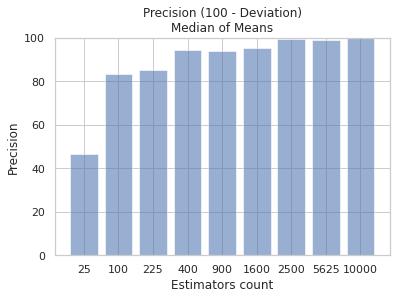

In [ ]:
estimators = [5 ** 2,
              10 ** 2,
              15 ** 2,
              20 ** 2,
              30 ** 2,
              40 ** 2,
              50 ** 2,
              75 ** 2,
              100 ** 2]

xticks = np.arange(len(estimators))
deviation = [diff_5_5_median_of_means,
             diff_10_10_median_of_means,
             diff_15_15_median_of_means,
             diff_20_20_median_of_means,
             diff_30_30_median_of_means,
             diff_40_40_median_of_means,
             diff_50_50_median_of_means,
             diff_75_75_median_of_means,
             diff_100_100_median_of_means]

precision = 100 - np.array(deviation)

plt.bar(xticks, precision, align='center', alpha=0.57)
plt.xticks(xticks, estimators)

plt.xlabel("Estimators count")
plt.ylabel('Precision')
plt.title('Precision (100 - Deviation)\nMedian of Means')

plt.ylim(0, 100)

plt.show()

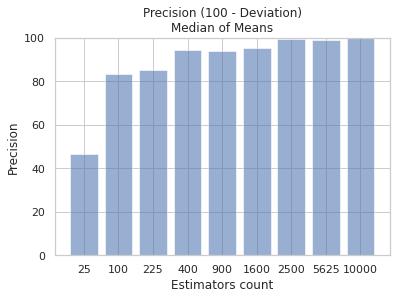

In [ ]:
estimators = [5 ** 2,
              10 ** 2,
              15 ** 2,
              20 ** 2,
              30 ** 2,
              40 ** 2,
              50 ** 2,
              75 ** 2,
              100 ** 2]

xticks = np.arange(len(estimators))
deviation = [diff_5_5_median_of_means,
             diff_10_10_median_of_means,
             diff_15_15_median_of_means,
             diff_20_20_median_of_means,
             diff_30_30_median_of_means,
             diff_40_40_median_of_means,
             diff_50_50_median_of_means,
             diff_75_75_median_of_means,
             diff_100_100_median_of_means]

precision = 100 - np.array(deviation)

plt.bar(xticks, precision, align='center', alpha=0.57)
plt.xticks(xticks, estimators)

plt.xlabel("Estimators count")
plt.ylabel('Precision')
plt.title('Precision (100 - Deviation)\nMedian of Means')

plt.ylim(0, 100)

plt.show()

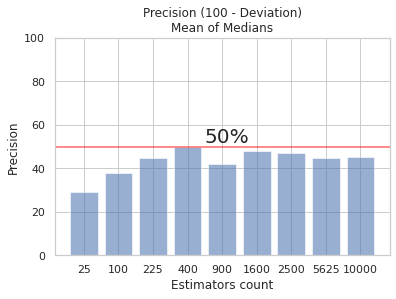

In [ ]:
estimators = [5 ** 2,
              10 ** 2,
              15 ** 2,
              20 ** 2,
              30 ** 2,
              40 ** 2,
              50 ** 2,
              75 ** 2,
              100 ** 2]

xticks = np.arange(len(estimators))
deviation = [diff_5_5_mean_of_medians,
             diff_10_10_mean_of_medians,
             diff_15_15_mean_of_medians,
             diff_20_20_mean_of_medians,
             diff_30_30_mean_of_medians,
             diff_40_40_mean_of_medians,
             diff_50_50_mean_of_medians,
             diff_75_75_mean_of_medians,
             diff_100_100_mean_of_medians]

precision = 100 - np.array(deviation)

plt.bar(xticks, precision, align='center', alpha=0.57)
plt.xticks(xticks, estimators)

plt.xlabel("Estimators count")
plt.ylabel('Precision')
plt.title('Precision (100 - Deviation)\nMean of Medians')

plt.ylim(0, 100)

plt.axhline(50, color='red', alpha=0.6)
plt.text(3.5, 52, '50%', color='black', fontsize=20, alpha=0.85)

plt.show()

Results
--

First, I'll note that in the code above the number of columns is equals to the number of "Alpha estimators" and the number of rows is equlas to the nubmer of "Beta estimators".

As we can see in the first results (median of means) as we grow our estimators (both alpha and beta) the result is converging to an $\epsilon$ error where $\epsilon$ close to zero $\rightarrow$ unbiased. $\checkmark$

On the other hand we can see in the second results (mean of medians) as we grow our estimators the reuslt is converging to 50% error, this is not by accident!

We can say for sure that the second version (mean of medians) is biased!

This can be happening due to the distribution of our basic estimators (our alpha).

We can examine this theory by run a test of 1 row and 1000 columns.



In [ ]:
res_1_1000 = run_simulation(rows=1, cols=1000)

diff_1_1000_median_of_means, diff_1_1000_mean_of_medians = show_results(results=res_1_1000)

---------- Real F2 ----------
11000378.0 


---------- Median of Means ----------
11422924.8 

---------- Difference ----------
3.84 %



---------- Mean of Medians ----------
5484968.0 

---------- Difference ----------
50.14 %





As we can see we converging to 50% error (Mean of Medians, mean have no meaning because our rows equals to 1).


